<a href="https://colab.research.google.com/github/yolandaakp/TugasUTSAndat2023/blob/main/Cryptocurrency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

melakukan import library.
import pandas untuk menganalisis data
import numpy untuk pengolahan data operasi matematika
import matplotlib untuk membuat grafik dan plot dari data yang di input
import seaborn untuk membuat grafik dan statistik, dibuat berdasarkan library matplotlib yang terintegrasi dengan struktur data pada pandas
import math untuk mengevaluasi operasi matematika yang kompleks
import datetime untuk input datetime dari data
%matplotlib inline untuk membuat grafik atau plot yang ditampilkan dalam bentuk notebook.

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/gunhee/amdgoogle?select=GOOGL.csv

In [ ]:
# https://drive.google.com/file/d/16WQ41x_G009QrREXA_tAShFgeTP4HzMT/view?usp=sharing

!gdown 16WQ41x_G009QrREXA_tAShFgeTP4HzMT

Downloading...
From: https://drive.google.com/uc?id=16WQ41x_G009QrREXA_tAShFgeTP4HzMT
To: /content/gemini_LTCUSD_2020_1min.csv
100% 42.1M/42.1M [00:00<00:00, 219MB/s]


Syntax diatas digunakan untuk download dataset yang telah diupload di gdrive

In [ ]:
train_data = pd.read_csv('Cryptocurrency2020.csv')
train_data.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.618880e+12,4/20/2021 0:03,LTCUSD,260.05,260.05,259.00,259.00,179.16470
1,1.618880e+12,4/20/2021 0:02,LTCUSD,262.77,262.86,260.00,260.05,307.77795
2,1.618880e+12,4/20/2021 0:01,LTCUSD,263.57,264.14,262.77,262.77,11.53982
3,1.618880e+12,4/20/2021 0:00,LTCUSD,261.32,263.76,261.32,263.57,110.88182
4,1.618880e+12,4/19/2021 23:59,LTCUSD,261.87,261.87,261.21,261.32,48.58221


Syntax diatas digunakan untuk membaca file csv yang ada pada dataset dan disimpan dengan nama variabel "train_data". Kemudian, data tersebut ditampilkan ke bentuk dataframe yang terdiri dari 5 baris

Check missing values

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658011 entries, 0 to 658010
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unix Timestamp  658011 non-null  float64
 1   Date            658011 non-null  object 
 2   Symbol          658011 non-null  object 
 3   Open            658011 non-null  float64
 4   High            658011 non-null  float64
 5   Low             658011 non-null  float64
 6   Close           658011 non-null  float64
 7   Volume          658011 non-null  float64
dtypes: float64(6), object(2)
memory usage: 40.2+ MB


Syntax diatas digunakan untuk mengetahui apakah ada missing values dari masing-masing fields

Check statistic vales for every features

In [ ]:
train_data.describe()

,Unix Timestamp,Open,High,Low,Close,Volume
count,6.580110e+05,658011.000000,658011.000000,658011.000000,658011.000000,658011.000000
mean,1.598614e+12,87.283381,87.333869,87.232358,87.283715,17.511961
std,1.188552e+10,60.845345,60.909081,60.780400,60.845677,93.709607
min,1.577840e+12,24.930000,25.520000,24.180000,24.930000,0.000000
25%,1.588310e+12,45.540000,45.550000,45.540000,45.540000,0.000000
50%,1.598790e+12,57.950000,57.960000,57.930000,57.950000,0.000000
75%,1.609000e+12,124.060000,124.170000,123.970000,124.060000,2.279655
max,1.618880e+12,335.530000,335.530000,334.680000,335.530000,7492.383020


Syntax diatas digunakan untuk melihat statistic summary dari dataset.

Handle datetime data for time series

In [ ]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2021-04-20 00:03:00,1.618880e+12,LTCUSD,260.05,260.05,259.00,259.00,179.16470
2021-04-20 00:02:00,1.618880e+12,LTCUSD,262.77,262.86,260.00,260.05,307.77795
2021-04-20 00:01:00,1.618880e+12,LTCUSD,263.57,264.14,262.77,262.77,11.53982
2021-04-20 00:00:00,1.618880e+12,LTCUSD,261.32,263.76,261.32,263.57,110.88182
2021-04-19 23:59:00,1.618880e+12,LTCUSD,261.87,261.87,261.21,261.32,48.58221


Syntax diatas diunakan untuk menganalisis berdasarkan data waktu

**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

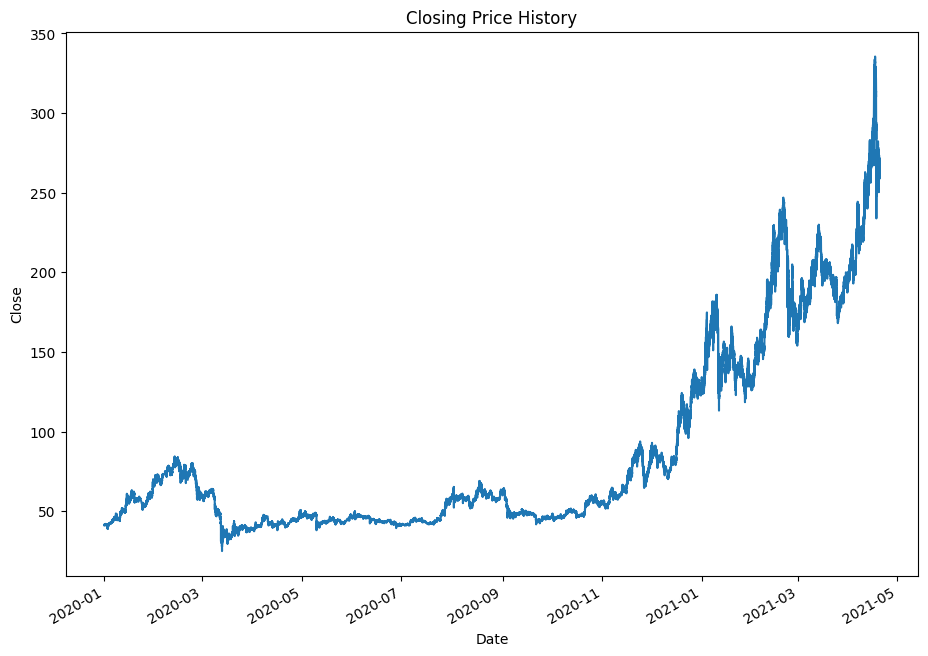

In [ ]:
#Resize plot
plt.figure(figsize=(11, 8))
train_data['Close'].plot()
#adding a title for the figure
plt.title('Closing Price History')
# x label
plt.xlabel('Date')
# y label
plt.ylabel('Close')
plt.show()

Grafik diatas menunjukkan kenaikan atau penurunan dari closing price yang ditinjau berdasarkan waktu.

<Figure size 1600x800 with 0 Axes>

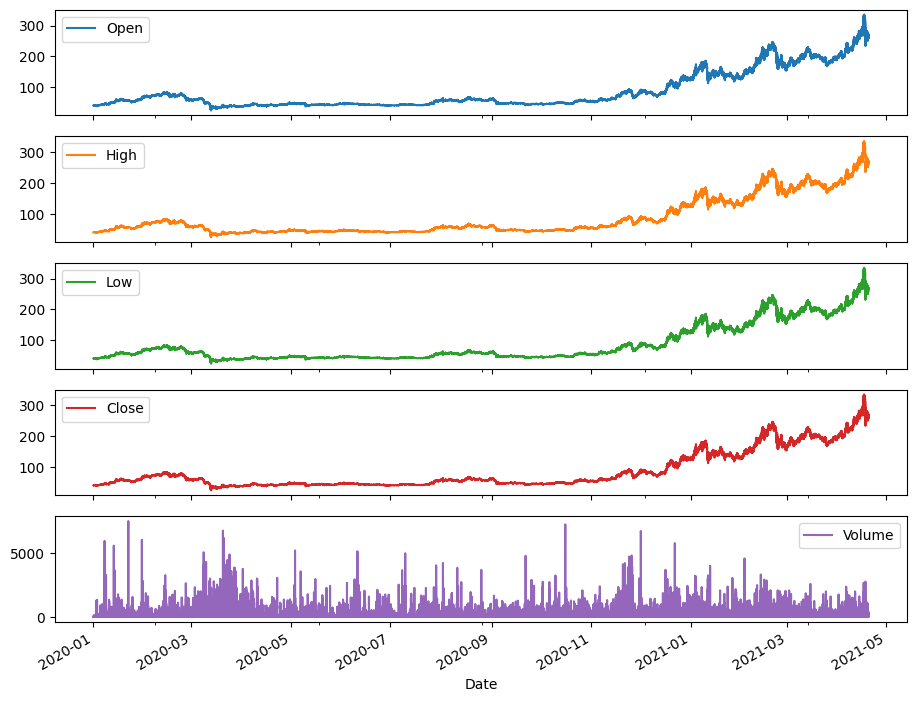

In [ ]:
#resize the plot
plt.figure(figsize=(16, 8))
cols = ['Open', 'High', 'Low', 'Close', 'Volume']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

Untuk data open, high, low, close itu mengalami kenaikan atau berjenis trend naik. Tetapi, untuk data vomue yang menunjukan jumlah pembeli saham itu mengalami naik turun atau stasioner.

In [ ]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

In [ ]:
df = train_data[['HL_PCT', 'PCT_change', 'Close','Volume']]

HL_PCT merupakan kolom baru yang berisikan persentasi perubahan dari fields 'High' dan 'Low'.

In [ ]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Close'].shift(-forecast_out)

32901


<ipython-input-16-e4fd59988e6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Close'].shift(-forecast_out)


Membuat fitur baru untuk data frame yang baru

Harga penutupan saham atau field close dijadikan label.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

import StandardScaler: normalisasi data
import LinearRegression, Ridge: regresi linear dari regresi ridge
import randomforestregressor: melatih model regresi menggunakan algoritma Random Forest
import SVR: melatih model regresi menggunakan metode Support Vector Regression dan merupakan salah satu metode yang bisa untuk peramalan
import train_test_split: membagi dataset menjadi subset pelatihan dan pengujian
import mean_squared_log_error: menghitung metrik kesalahan regresi berupa mean squared logarithmic error

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [ ]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-18-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


Melakukan scalling. Pake standardscaler untuk normalisasi data karena data berisi harga saham dengan interval atau range yang jauh.

In [ ]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

melakukan slicing. mengambil 'forecast_out' baris akhir dari 'x' dan hasilnya disimpan dengan nama variabel 'X_Predictions' yang berisi data yang akan diprediksi.
selanjutnya mengambil semua baris dari 'x' kecuali 'forecast_out' baris terakhir untuk melatih model

In [ ]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-20-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


menghapus baris-baris yang mengandung nilai yang hilang (NaN) dari dataset dengan parameter inplace = true.
Selanjutnya membuat variabel y yang isinya kolom 'label'.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Melakukan splitting. dilakukan dengan 2 model (LinearRegression dan Random Forest Regressor)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [ ]:
lr_confidence

0.8344647110208081

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

random forest akan berisi banyak tree, kemudian di voting pohon atau tree yang mana yang bagus.

In [ ]:
rf_confidence

0.9025111970377075

In [ ]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

Output streaming akan dipotong hingga 5000 baris terakhir.
<ipython-input-27-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-27-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-27-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

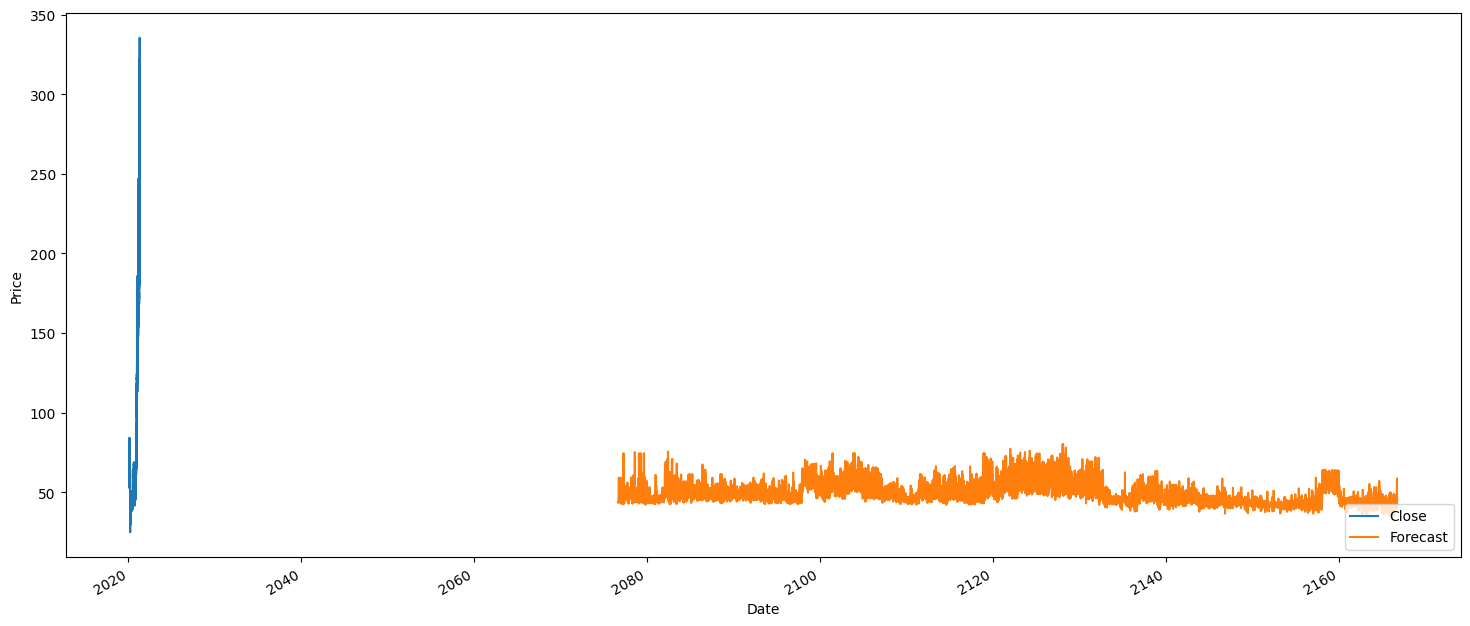

In [ ]:
plt.figure(figsize=(18, 8))
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()